# Reunindo os dados

In [5]:
import pandas as pd

# Lista com os anos de interesse
anos = [2022, 2021, 2020, 2019, 2018]

# Lista para armazenar os DataFrames de cada arquivo
dataframes = []

# Loop pelos anos e cria um DataFrame para cada arquivo
for ano in anos:
    # Monta o nome do arquivo com base no ano
    nome_arquivo = f"{ano}.csv"
    
    # Lê o arquivo CSV em um DataFrame
    df = pd.read_csv(nome_arquivo, encoding='utf-8')
    
    # Adiciona o DataFrame à lista
    dataframes.append(df)

# Concatena todos os DataFrames em um único DataFrame
livros = pd.concat(dataframes, ignore_index=True)


print(livros.head(10))

                                         titulo              autor_vendas  \
0                             É assim que acaba            Colleen Hoover   
1                      Mais esperto que o diabo             Napoleon Hill   
2                         Nas pegadas da alemoa                Ilko Minev   
3  Mulheres que correm com os lobos (capa dura)    Clarissa Pinkola Estes   
4                                 Amor & gelato         Jenna Evans Welch   
5                            É assim que começa            Colleen Hoover   
6                                   Torto arado      Itamar Vieira Junior   
7              O poder da autorresponsabilidade              Paulo Vieira   
8                               O poder da cura  Padre Reginaldo Manzotti   
9                Os sete maridos de Evelyn Hugo       Taylor Jenkins Reid   

         editora   categoria  páginas   vendas autor  paginas  
0  Galera Record      Ficção    368.0  127.884   NaN      NaN  
1        Citadel   Autoa

# Análises iniciais

In [17]:
# Calcula o número total de vendas de todos os livros
total_vendas = livros['vendas'].sum()
print(f'Total de vendas de todos os livros: {total_vendas}')

# Calcula o número de livros por categoria
livros_por_categoria = livros.groupby('categoria')['titulo'].count().sort_values(ascending=False)
print('Número de livros por categoria:')
print(livros_por_categoria)
print("")

# Calcula a média e o desvio padrão do número de páginas dos livros
media_paginas = livros['paginas'].mean()
desvio_padrao_paginas = livros['paginas'].std()
print(f'Média do número de páginas: {media_paginas:.2f}')
print(f'Desvio padrão do número de páginas: {desvio_padrao_paginas:.2f}')
print("")

# Calcula o número de livros por editora
livros_por_editora = livros.groupby('editora')['titulo'].count().sort_values(ascending=False)
print('Número de livros por editora:')
print(livros_por_editora)

Total de vendas de todos os livros: 7835.216
Número de livros por categoria:
categoria
Negócios          28
Autoajuda         27
Ficção            22
Infantojuvenil    13
Não ficção        10
Name: titulo, dtype: int64

Média do número de páginas: 259.73
Desvio padrão do número de páginas: 124.12

Número de livros por editora:
editora
Intrínseca              10
Sextante                10
Gente                    9
Objetiva                 7
Citadel                  5
Rocco                    5
HarperCollins            5
Buzz                     5
Seguinte                 4
BestSeller               4
Pixel                    4
Faro Editorial           4
Companhia das Letras     3
Petra                    3
Galera Record            3
Alta Books Editora       3
Todavia                  2
Vozes                    2
Paralela                 2
L&PM                     2
Arqueiro                 2
Planeta do Brasil        1
Globo Livros             1
Globo Alt                1
Ciranda Cultura

# Vendas ano a ano


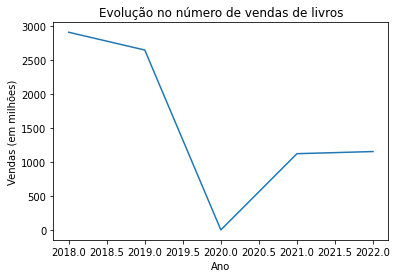

In [33]:
import matplotlib.pyplot as plt

# Lista de arquivos CSV com dados de vendas
arquivos_csv = ['2018.csv', '2019.csv', '2020.csv', '2021.csv', '2022.csv']

# Cria uma lista vazia para armazenar as somas de vendas de cada ano
somas_vendas = []

# Itera sobre os arquivos CSV e soma as vendas de cada um
for arquivo in arquivos_csv:
    df = pd.read_csv(arquivo)
    soma_vendas = df['vendas'].sum()
    somas_vendas.append(soma_vendas)

# Cria uma lista com os anos correspondentes a cada soma de vendas
anos = [int(arquivo.split('.')[0]) for arquivo in arquivos_csv]

# Plota o gráfico de evolução no número de vendas ao longo do tempo
plt.plot(anos, somas_vendas)
plt.title('Evolução no número de vendas de livros')
plt.xlabel('Ano')
plt.ylabel('Vendas (em milhões)')


plt.show()

O eixo X foi dividido em ano.0 e ano.5, correspondente a cada semestre ano. Percebe-se que o primeiro semestre de 2020 -- correspondente ao início da pandemia da covid-19 -- teve o mínimo de vendas.